In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
train = pd.read_csv('train.csv')
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_bool
0,51,admin.,married,tertiary,no,148,no,no,cellular,15,apr,263,2,-1,0,unknown,0
1,55,blue-collar,married,secondary,no,7160,yes,no,unknown,4,may,315,1,-1,0,unknown,0
2,65,blue-collar,divorced,tertiary,no,2197,yes,no,cellular,12,may,102,2,-1,0,unknown,0
3,25,admin.,married,secondary,no,6658,yes,no,cellular,16,feb,197,1,-1,0,unknown,1
4,36,services,married,secondary,no,1761,yes,no,cellular,19,sep,177,1,-1,0,success,0


In [67]:
train.shape

(21000, 17)

In [68]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y_bool       0
dtype: int64

In [69]:
train.duplicated().sum()

0

In [70]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous,y_bool
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,36.997952,1607.497810,11.056571,264.085048,2.013381,3.231952,0.102524,0.269095
std,10.484725,2991.187132,7.450415,288.163812,1.575916,23.161489,0.664355,0.443500
min,19.000000,-2072.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,29.000000,299.000000,5.000000,94.000000,1.000000,-1.000000,0.000000,0.000000
50%,35.000000,633.000000,10.000000,184.000000,2.000000,-1.000000,0.000000,0.000000
75%,45.000000,1875.000000,16.000000,319.000000,2.000000,-1.000000,0.000000,1.000000
max,87.000000,71188.000000,31.000000,2703.000000,28.000000,437.000000,14.000000,1.000000


In [71]:
test = pd.read_csv('test.csv')
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,36,technician,divorced,secondary,no,1842,yes,yes,cellular,5,aug,149,1,-1,0,unknown
1,26,management,married,primary,no,165,no,no,cellular,7,nov,44,2,-1,0,unknown
2,50,management,married,unknown,no,5006,yes,no,cellular,7,may,664,2,-1,0,other
3,56,management,married,secondary,no,5122,no,no,cellular,9,aug,53,2,-1,0,unknown
4,26,blue-collar,married,tertiary,no,151,no,no,unknown,1,jul,67,5,130,0,unknown


In [72]:
test.shape

(9000, 16)

In [73]:
test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<AxesSubplot:>

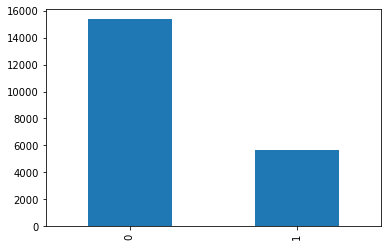

In [74]:
train['y_bool'].value_counts().plot(kind = 'bar')

In [75]:
train['y_bool'].value_counts()

0    15349
1     5651
Name: y_bool, dtype: int64

In [76]:
numerical_category = train.select_dtypes(exclude= 'object')
numerical_category.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y_bool'],
      dtype='object')

In [77]:
categorical_category = train.select_dtypes(include = 'object')
categorical_category.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [78]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(30000, 17)

In [79]:
from sklearn.preprocessing import KBinsDiscretizer
dics = KBinsDiscretizer(n_bins = 5, strategy= 'quantile', encode = 'ordinal')

In [80]:
dics.fit(combined[['age']])

KBinsDiscretizer(encode='ordinal')

In [81]:
combined['age_rank'] = dics.transform(combined[['age']])

In [82]:
dics.bin_edges_

array([array([19., 27., 33., 38., 48., 87.])], dtype=object)

In [83]:
def agegp(age):
    if age<31:
        return 'young'
    elif age<51:
        return 'middle'
    else:
        return 'senoir'

In [84]:
combined['age_group'] = combined['age'].map(agegp)

In [85]:
def jobtyp(job):
    if job in ['self-employed','housemaid','entrepreneur']:
        return 'self_employed'
    elif job in ['unknown','unemployed','student']:
        return 'unemployed'
    elif job in ['blue-collar','services']:
        return 'blue_collar'
    else:
        return job

In [86]:
combined['job_type'] = combined['job'].map(jobtyp)

In [87]:
combined['balance_pos'] = combined['balance'].apply(lambda x: 'yes' if x>0 else 'no')

In [88]:
disc_bal = KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
disc_bal.fit(combined[['balance']])
combined['balance_rank'] = disc_bal.transform(combined[['balance']])

In [89]:
disc_bal.bin_edges_

array([array([-2.4770e+03,  5.7000e+01,  2.3600e+02,  3.6600e+02,  4.9200e+02,
        6.3400e+02,  1.0784e+03,  1.6130e+03,  2.1990e+03,  3.7200e+03,
        7.1188e+04])], dtype=object)

In [90]:
def bal_range(bal):
    if bal<25:
        return 'low_bal'
    elif bal<500:
        return 'medium_bal'
    elif bal<2000:
        return 'high_bal'
    else:
        return 'very_high_bal'

In [91]:
combined['bal_range'] = combined['balance'].map(bal_range)

In [92]:
def week(day):
    if day<8:
        return 'Week1'
    elif day<15:
        return 'Week2'
    elif day<22:
        return 'Week3'
    else:
        return 'Week4'

In [93]:
combined['week'] = combined['day'].map(week)

In [94]:
combined['duration'] = combined['duration']/60

In [95]:
disc_dur = KBinsDiscretizer(n_bins=5,strategy='quantile',encode='ordinal')
disc_dur.fit(combined[['duration']])
combined['duration_rank'] = disc_dur.transform(combined[['duration']])

In [96]:
disc_dur.bin_edges_

array([array([ 0.06666667,  1.28333333,  2.41666667,  3.81666667,  6.03333333,
       45.05      ])], dtype=object)

In [97]:
def call_time(time):
    if time<=1:
        return '<1min'
    elif time<=3:
        return '1-3min'
    elif time<=10:
        return '3-10min'
    else:
        return '>10 min'

In [98]:
combined['call_dur'] = combined['duration'].map(call_time)

In [99]:
combined['new_contact'] = combined['pdays'].apply(lambda x:'new_cust' if x==-1 else 'old_cust')

In [100]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30000 non-null  int64  
 1   job            30000 non-null  object 
 2   marital        30000 non-null  object 
 3   education      30000 non-null  object 
 4   default        30000 non-null  object 
 5   balance        30000 non-null  int64  
 6   housing        30000 non-null  object 
 7   loan           30000 non-null  object 
 8   contact        30000 non-null  object 
 9   day            30000 non-null  int64  
 10  month          30000 non-null  object 
 11  duration       30000 non-null  float64
 12  campaign       30000 non-null  int64  
 13  pdays          30000 non-null  int64  
 14  previous       30000 non-null  int64  
 15  poutcome       30000 non-null  object 
 16  y_bool         21000 non-null  float64
 17  age_rank       30000 non-null  float64
 18  age_gro

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
feat = ['age','job_type','marital','education','balance','housing',
     'loan','contact','month','duration','campaign','poutcome',
     'age_group','bal_range','week','call_dur','new_contact']

In [103]:
newtrain = combined.iloc[0:21000, :]
newtrain.shape

(21000, 27)

In [104]:
newtest = combined.iloc[21000: , :]
newtest = newtest.drop('y_bool', axis = 1)
newtest.shape

(9000, 26)

In [107]:
def outlier_capping(df,col):

        q1=newtrain[col].quantile(0.25)
        q3=newtrain[col].quantile(0.75)
        iqr=q3-q1
        
        upper_whisker=q3 + 1.5 * iqr
        lower_whisker=q1- 1.5 * iqr
        
        newtrain[col]=np.where(newtrain[col]>upper_whisker,upper_whisker, #true action
                        np.where(newtrain[col]<lower_whisker,lower_whisker,newtrain[col]))

In [109]:
outlier_cols=['age','balance','duration','campaign']
for col in outlier_cols:
    outlier_capping(newtrain,col)

<ipython-input-107-35c2606e5377>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain[col]=np.where(newtrain[col]>upper_whisker,upper_whisker, #true action
<ipython-input-107-35c2606e5377>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain[col]=np.where(newtrain[col]>upper_whisker,upper_whisker, #true action
<ipython-input-107-35c2606e5377>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [110]:
outlier_cols=['age','balance','duration','campaign']
for col in outlier_cols:
    outlier_capping(newtest,col)

<ipython-input-107-35c2606e5377>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain[col]=np.where(newtrain[col]>upper_whisker,upper_whisker, #true action
<ipython-input-107-35c2606e5377>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtrain[col]=np.where(newtrain[col]>upper_whisker,upper_whisker, #true action
<ipython-input-107-35c2606e5377>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [111]:
newtrain.shape

(21000, 27)

In [113]:
newtrain = pd.get_dummies(newtrain,columns=['job_type', 'marital', 'education','housing', 'loan',
                                        'contact', 'month','poutcome','age_group','bal_range', 'week',
                                        'call_dur', 'new_contact'],drop_first=False)

In [112]:
newtest = pd.get_dummies(newtest,columns=['job_type', 'marital', 'education','housing', 'loan',
                                        'contact', 'month','poutcome','age_group','bal_range', 'week',
                                        'call_dur', 'new_contact'],drop_first=False)

In [115]:
newtrain = newtrain.drop(['job','default','day','pdays','previous', 'duration_rank', 'balance_rank', 'balance_pos', 'age_rank'], axis = 1)

In [117]:
newtest = newtest.drop(['job','default','day','pdays','previous', 'duration_rank', 'balance_rank', 'balance_pos', 'age_rank'], axis = 1)

In [118]:
newtest.shape

(9000, 58)

In [119]:
newtrain = newtrain.drop(columns=['job_type_unemployed','marital_divorced','education_unknown','housing_no','loan_no',
                     'contact_unknown','month_dec','poutcome_unknown','age_group_middle','bal_range_high_bal',
                     'week_Week1','call_dur_1-3min','new_contact_new_cust'])

In [121]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 0 to 20999
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      21000 non-null  float64
 1   balance                  21000 non-null  float64
 2   duration                 21000 non-null  float64
 3   campaign                 21000 non-null  float64
 4   y_bool                   21000 non-null  float64
 5   job_type_admin.          21000 non-null  uint8  
 6   job_type_blue_collar     21000 non-null  uint8  
 7   job_type_management      21000 non-null  uint8  
 8   job_type_retired         21000 non-null  uint8  
 9   job_type_self_employed   21000 non-null  uint8  
 10  job_type_technician      21000 non-null  uint8  
 11  marital_married          21000 non-null  uint8  
 12  marital_single           21000 non-null  uint8  
 13  education_primary        21000 non-null  uint8  
 14  education_secondary   

In [120]:
newtest = newtest.drop(columns=['job_type_unemployed','marital_divorced','education_unknown','housing_no','loan_no',
                     'contact_unknown','month_dec','poutcome_unknown','age_group_middle','bal_range_high_bal',
                     'week_Week1','call_dur_1-3min','new_contact_new_cust'])

In [122]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 8999
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      9000 non-null   int64  
 1   balance                  9000 non-null   int64  
 2   duration                 9000 non-null   float64
 3   campaign                 9000 non-null   int64  
 4   job_type_admin.          9000 non-null   uint8  
 5   job_type_blue_collar     9000 non-null   uint8  
 6   job_type_management      9000 non-null   uint8  
 7   job_type_retired         9000 non-null   uint8  
 8   job_type_self_employed   9000 non-null   uint8  
 9   job_type_technician      9000 non-null   uint8  
 10  marital_married          9000 non-null   uint8  
 11  marital_single           9000 non-null   uint8  
 12  education_primary        9000 non-null   uint8  
 13  education_secondary      9000 non-null   uint8  
 14  education_tertiary      

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [124]:
x = newtrain.drop('y_bool', axis = 1)
y = newtrain['y_bool']

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [126]:
rf = RandomForestClassifier(n_jobs=-1,oob_score=True)

In [127]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True)

In [128]:
rf.oob_score_

0.7201904761904762

In [129]:
rf.feature_importances_

array([0.11430867, 0.14563191, 0.14208989, 0.04471502, 0.01337605,
       0.01863337, 0.01573035, 0.00830294, 0.00831552, 0.01621446,
       0.02333763, 0.0168268 , 0.01292414, 0.02147796, 0.0197722 ,
       0.02524238, 0.02119218, 0.0258297 , 0.00978384, 0.01307505,
       0.01022135, 0.00833448, 0.00545034, 0.01770174, 0.01314389,
       0.00278087, 0.01664153, 0.01350522, 0.00375163, 0.00288153,
       0.02035279, 0.00769865, 0.00521774, 0.00789043, 0.00881743,
       0.00501611, 0.01650995, 0.01372418, 0.02335461, 0.01941022,
       0.01377536, 0.01908892, 0.01149261, 0.00723538, 0.009223  ])

In [130]:
feat_imp=pd.DataFrame(data=rf.feature_importances_,index=x_train.columns,columns=['importance'])

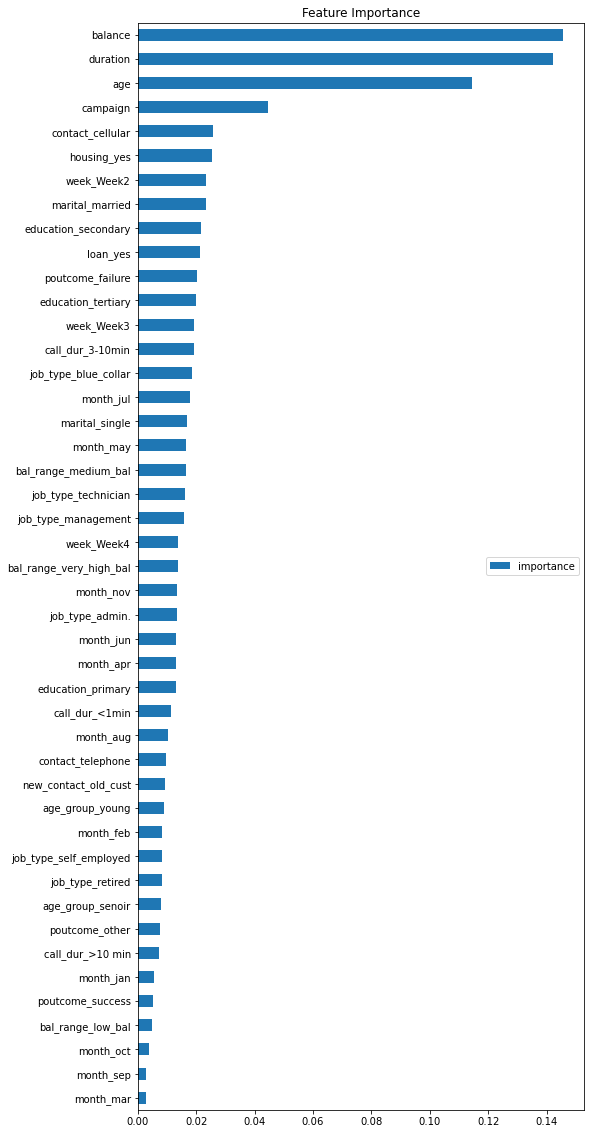

In [131]:
feat_imp.sort_values('importance').plot(kind='barh',title='Feature Importance',figsize=(8,20)).legend(loc='right')

In [132]:
feat_zip=feat_imp[feat_imp['importance']>0.016].index

In [133]:
feat_zip=feat_zip.to_list()
feat_zip

['age',
 'balance',
 'duration',
 'campaign',
 'job_type_blue_collar',
 'job_type_technician',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'housing_yes',
 'loan_yes',
 'contact_cellular',
 'month_jul',
 'month_may',
 'poutcome_failure',
 'bal_range_medium_bal',
 'week_Week2',
 'week_Week3',
 'call_dur_3-10min']

In [134]:
x_train = newtrain[feat_zip]
y_train = newtrain['y_bool']
x_test = newtest[feat_zip]

In [135]:
rf = RandomForestClassifier(n_estimators=50,max_depth=5,n_jobs=-1,random_state=50)
y_pred = rf.fit(x_train, y_train).predict(x_test)

In [136]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [137]:
solution = pd.DataFrame({'y_bool': y_pred})
solution.to_csv('Solution.csv', index = False)